In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### labels or Y data 
target = pd.read_csv("./training_set_labels.csv", index_col=0)
target.shape

(26707, 2)

### Finding the number of rows and columns in the Training and Test set 

In [2]:
# Features or X
features = pd.read_csv("./training_set_features.csv", index_col=0)
features.shape

(26707, 35)

In [3]:
# this is for submission
test_set_features = pd.read_csv("./test_set_features.csv", index_col=0)
test_set_features.shape

(26708, 35)

In [4]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26707 entries, 0 to 26706
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker   

### Process to identify NULL values that have to be treated approproately based on what field it is 

In [5]:
# Searching for null values.
features.isna().sum() 

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

### Charts to understand more about the data features

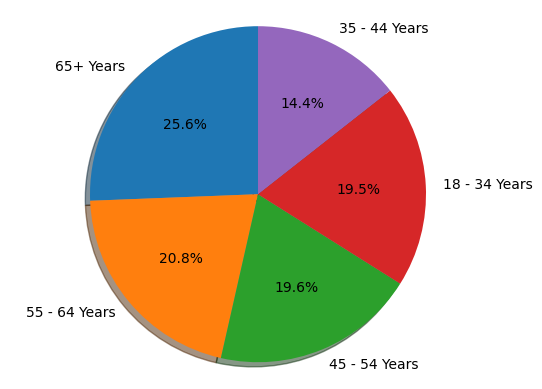

In [6]:
### Age group plot

age_group_countes = features["age_group"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(age_group_countes, labels=age_group_countes.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

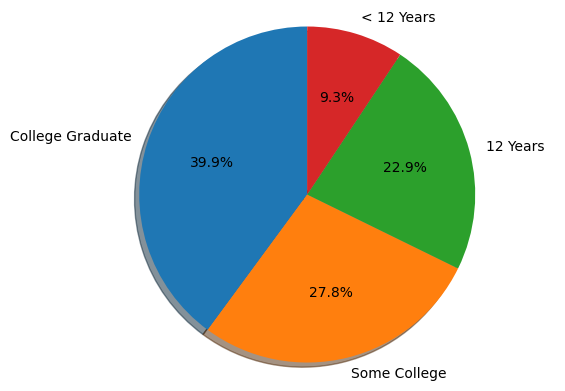

In [7]:
### education group plot

education_group_countes = features["education"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(education_group_countes, labels=education_group_countes.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

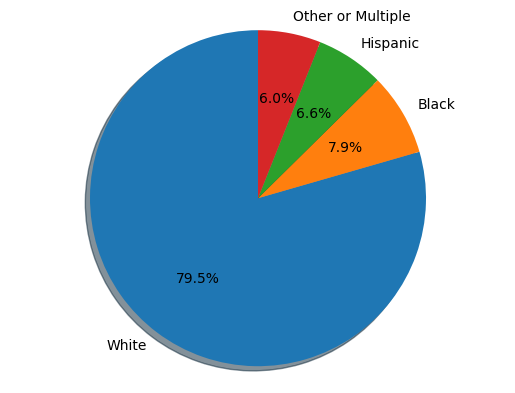

In [8]:
### Race  plot

race_group_countes = features["race"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(race_group_countes, labels=race_group_countes.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

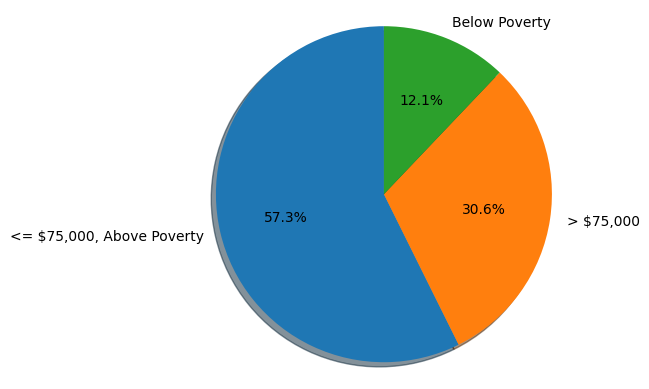

In [9]:
### Income poverty plot
income_poverty_group_countes = features["income_poverty"].value_counts()
fig1, ax1 = plt.subplots()
ax1.pie(income_poverty_group_countes, labels=income_poverty_group_countes.index, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Data pipelines for inputing NUlls or missing values ,Scaling the data and encoding data

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

### pipeline for handling numeric values
num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("scaler", StandardScaler())
    ])

### pipeline for hardcoding values 
# The constant on here is ZERO, as we will assume that missing values on 
# This is for health_insurance are those who are not covered.
hardcoded_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="constant")),
        ("scaler", StandardScaler())
    ])

###check this with Luis as to what he means by non weight
non_weight_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(sparse=False)),
    ])

###Categorical values pipeline
# Indicating to pipeline replace those null values with
# the most frequent value found in that specific row.
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OrdinalEncoder()),
    ])

#### Separating features or attributes into numeric, hardcoded or categorical for pipeline purposes

num_attribs = ["h1n1_concern", "h1n1_knowledge", "behavioral_antiviral_meds", "behavioral_avoidance", "behavioral_face_mask","behavioral_wash_hands","behavioral_large_gatherings", "behavioral_outside_home", "behavioral_touch_face", "doctor_recc_h1n1", "doctor_recc_seasonal", "chronic_med_condition", "child_under_6_months", "health_worker", "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc", "opinion_seas_vacc_effective", "opinion_seas_risk", "opinion_seas_sick_from_vacc"]
hardcoded_attribs = ["health_insurance"]
non_weight_attribs = ["race", "sex", "hhs_geo_region", "employment_industry", "employment_occupation"]
cat_attribs = ["age_group", "education", "income_poverty", "marital_status", "rent_or_own", "employment_status", "census_msa", "household_adults", "household_children"]

#### applying pipelines to features data 
preprocess_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("hardcoded", hardcoded_pipeline, hardcoded_attribs),
        ("non_weight", non_weight_pipeline, non_weight_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])
total_attribs = num_attribs + hardcoded_attribs + non_weight_attribs +cat_attribs
X_train = preprocess_pipeline.fit_transform(
    features[total_attribs])
    
### label or Y data
    
y_train = target["h1n1_vaccine"]
y_train

respondent_id
0        0
1        0
2        0
3        0
4        0
        ..
26702    0
26703    0
26704    0
26705    0
26706    0
Name: h1n1_vaccine, Length: 26707, dtype: int64

### Splitting data data into training and test data

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

### Logistic Regression Modelling

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Please, check the variables applicable to next line:
logistic_clf = LogisticRegression(max_iter=400)
logistic_clf.fit(X_train, y_train)

y_pred = logistic_clf.predict(X_test)
print("mean_squared_error: {}".format(mean_squared_error(y_test, y_pred)))
print("mean_accuracy_score: {}".format(logistic_clf.score(X_train, y_train)))
# Please, "MARK 1" below to check this that code is needed.

mean_squared_error: 0.15200299513290902
mean_accuracy_score: 0.8530544559751791


In [13]:
# Tuning LogisticRegression with GridSearchCV
# Execution time: 2m
from sklearn.model_selection import GridSearchCV
logreg = LogisticRegression(max_iter=1000)
parameters_grid = [
  {'penalty':['none','l2']},
  {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
  {'tol': [0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100]},
  {'solver':['lbfgs']}
]
grid_search_logreg_cv = GridSearchCV(estimator = logreg,  
                           param_grid = parameters_grid,
                           scoring = 'neg_mean_squared_error',
                           cv = 5,
                           verbose=0)

grid_search_logreg_cv.fit(X_train, y_train)   
 
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_search_logreg_cv.best_params_))
print("neg_mean_squared_error {}".format(grid_search_logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 10}
neg_mean_squared_error -0.14887117424237548


In [14]:
# Tuning LogisticRegression with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

parameters_random = [
  {'penalty':['none','l2']},
  {'C': list(range(10))},
  {'tol': np.linspace(0.00001, 100)},
  {'solver':['lbfgs']}
]

random_search_logreg_cv = RandomizedSearchCV(estimator = logreg,  
                           param_distributions = parameters_random,
                           scoring = 'neg_mean_squared_error',
                           n_iter = 7,
                           verbose=1)

random_search_logreg_cv.fit(X_train, y_train)   

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(random_search_logreg_cv.best_params_))
print("neg_mean_squared_error {}".format(random_search_logreg_cv.best_score_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tuned Logistic Regression Parameters: {'tol': 18.367355102040815}
neg_mean_squared_error -0.1487107321479908


### Checking the accuracy, precision , recall and f1 scores for logistic regression

In [15]:
# MARK 1.
# Under review: Please, place this before tunning i is needed.
# from sklearn.metrics import accuracy_score

# y_pred = logreg_cv.predict(X_test)
# accuracy_score(y_test, y_pred)

In [16]:
# Any score, median, place before tuning.
# Let's try to merge in one block cross_val_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score

logistic_scores = cross_val_score(logistic_clf, X_train, y_train, cv=5)
logistic_scores.mean()

0.8511287828280596

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
# X_train_transformed.shape
# model is for logistic
logistic_clf_y_pred = logistic_clf.predict(X_test)
logistic_clf_y_pred_proba = logistic_clf.predict_proba(X_test) #to calculate ROC_AUC, we need model.predict_proba() instead of model.pred()

print("accuracy_score: {}".format(accuracy_score(y_test, logistic_clf_y_pred)))
print("precision_score: {}".format(precision_score(y_test, logistic_clf_y_pred)))
print("recall_score: {}".format(recall_score(y_test, logistic_clf_y_pred)))
print("f1_score: {}".format(f1_score(y_test, logistic_clf_y_pred)))

accuracy_score: 0.847997004867091
precision_score: 0.7076788830715532
recall_score: 0.4787485242030697
f1_score: 0.5711267605633802


In [18]:
# Why we need this?
logistic_clf_y_pred_proba

array([[0.93265068, 0.06734932],
       [0.94426318, 0.05573682],
       [0.92893276, 0.07106724],
       ...,
       [0.99780004, 0.00219996],
       [0.98954141, 0.01045859],
       [0.91484995, 0.08515005]])

### Random forest classifier modelling

In [19]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)
forest_clf_X_test = preprocess_pipeline.transform(test_set_features[total_attribs])
forest_clf_y_pred = forest_clf.predict(X_test)

# Checking the accuracy, precision , recall and f1 scores for random forest regression
print("accuracy_score: {}".format(accuracy_score(y_test, forest_clf_y_pred)))
print("precision_score: {}".format(precision_score(y_test, forest_clf_y_pred)))
print("recall_score: {}".format(recall_score(y_test, forest_clf_y_pred)))
print("f1_score: {}".format(f1_score(y_test, forest_clf_y_pred)))
# Review if this is needed:
# forest_clf_y_pred_proba = forest_clf.predict_proba(X_test) #to calculate ROC_AUC, we need model.predict_proba() instead of model.pred()


accuracy_score: 0.8464994384125796
precision_score: 0.7473347547974414
recall_score: 0.4138134592680047
f1_score: 0.5326747720364742


In [20]:
# Tuning RandomForestClassifier with GridSearchCV
# Time to execute: 3min
from sklearn.model_selection import GridSearchCV
forest_clf = RandomForestClassifier(random_state=42)
parameters_grid = [
  {'n_estimators': [25, 50, 75, 100, 125, 150, 175, 200]},
  {'max_features': ['sqrt','log2']},
  {'min_weight_fraction_leaf': [0, 0.05, 0.1, 0.15]}
]
grid_search_forest_clf = GridSearchCV(estimator = forest_clf,  
                           param_grid = parameters_grid,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=1)

grid_search_forest_clf.fit(X_train, y_train)   

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(grid_search_forest_clf.best_params_))
print("Best score: {}".format(grid_search_forest_clf.best_score_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Tuned Logistic Regression Parameters: {'n_estimators': 175}
Best score: 0.85080758382248


In [21]:
# Tuning RandomForestClassifier with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

forest_clf = RandomForestClassifier(random_state=42)

parameters_random = [
  {'n_estimators': list(range(201))},
  {'max_features': ['sqrt','log2']},
  {'min_weight_fraction_leaf': np.linspace(0, 0.15, 30)}
]

random_search_forest_clf = RandomizedSearchCV(estimator = forest_clf,  
                           param_distributions = parameters_random,
                           scoring = 'accuracy',
                           n_iter = 7,
                           verbose=1)

random_search_forest_clf.fit(X_train, y_train)   

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(random_search_forest_clf.best_params_))
print("Best score: {}".format(random_search_forest_clf.best_score_))

Fitting 5 folds for each of 7 candidates, totalling 35 fits
Tuned Logistic Regression Parameters: {'n_estimators': 179}
Best score: 0.8509680545365745


In [22]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=5)
forest_scores.mean()

0.8496308272054958

In [33]:
# Execution time: 5m
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

param_grid = [
        {'kernel': ['linear'], 'C': [10., 30., 100., 300., 1000., 3000., 10000., 30000.0]},
        {'kernel': ['rbf'], 'C': [1.0, 3.0, 10., 30., 100., 300., 1000.0],
         'gamma': [0.01, 0.03, 0.1, 0.3, 1.0, 3.0]},
    ]

svm_reg = SVR()
grid_search = GridSearchCV(svm_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END ..............................C=10.0, kernel=linear; total time=   6.3s
[CV] END ..............................C=10.0, kernel=linear; total time=   8.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.5s
[CV] END ..............................C=10.0, kernel=linear; total time=   7.1s
[CV] END ..............................C=10.0, kernel=linear; total time=   5.7s
[CV] END ..............................C=30.0, kernel=linear; total time=  20.7s
[CV] END ..............................C=30.0, kernel=linear; total time=  17.5s
[CV] END ..............................C=30.0, kernel=linear; total time=  19.3s
[CV] END ..............................C=30.0, kernel=linear; total time=  24.4s
[CV] END ..............................C=30.0, kernel=linear; total time=  19.5s
[CV] END .............................C=100.0, kernel=linear; total time= 1.2min
[CV] END .............................C=100.0, 

In [2]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
from sklearn.svm import SVR

param_distribs = {
        'kernel': ['linear', 'rbf'],
        'C': reciprocal(20, 200000),
        'gamma': expon(scale=1.0),
    }

svm_reg = SVR()
rnd_search = RandomizedSearchCV(svm_reg, param_distributions=param_distribs,
                                n_iter=50, cv=5, scoring='neg_mean_squared_error',
                                verbose=1, random_state=42)
rnd_search.fit(X_train, y_train)

NameError: name 'X_train' is not defined

### We need to FIT SVC model TBD

In [23]:
from sklearn.svm import SVC

svm_clf = SVC(gamma="auto")
svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=5)
svm_scores.mean()

0.8506474851646157

### Graph for various models 

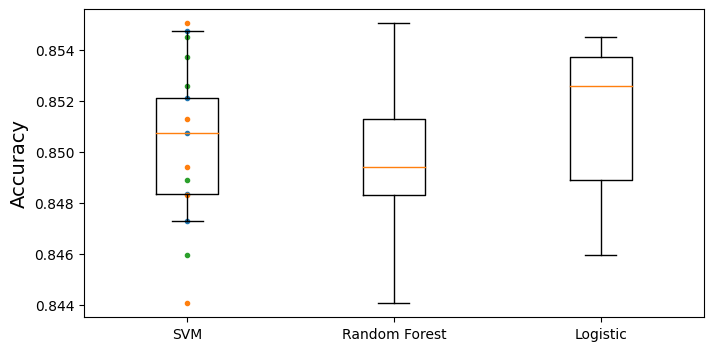

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot([1]*5, svm_scores, ".")
plt.plot([1]*5, forest_scores, ".")
plt.plot([1]*5, logistic_scores, ".")

plt.boxplot([svm_scores, forest_scores, logistic_scores], labels=("SVM","Random Forest", "Logistic"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()